This notebook is for conducting performance analysis and benchmarking of the model. <br>

3 models are used for performance analysis, namely 'small', 'medium', and 'large' model. The size of model is identified by the number of layers as well as neurons per layer. 

- Small: [32]
- Medium: [64,32,16]
- Large: [128,64,32,16]


Note that other hyperparameters are kept the same. That is, for each model used:
- Optimise: Adam
- Activation Functoin: ReLU
- Max Iteration: 200 (except when profiling memory usage where max_it = 5)
- Learning rate: 0.001

Note that here model complexity is considered by number of layers and unit per layer


My trainings and prediction tasks are running on the CPU. My laptop is MacBook Air with M2 chip.
Hence all benchmarking and analysis done is CPU-based.

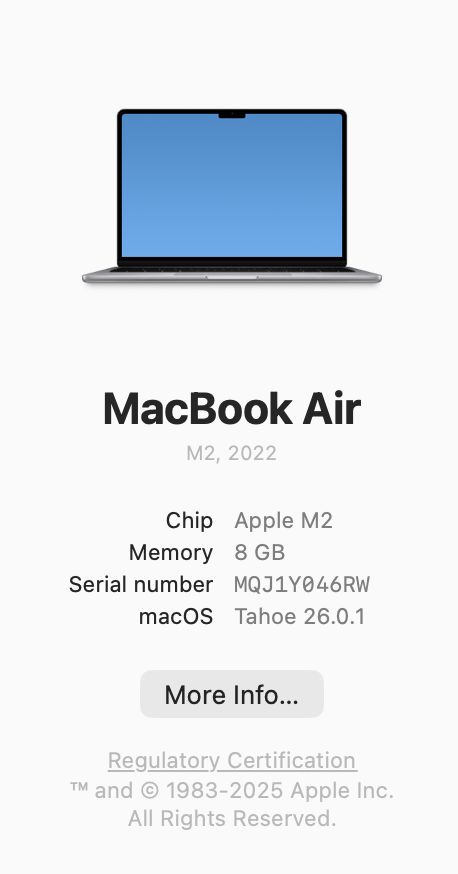

In [1]:
import performance_analysis as pa
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
from fivedreg.model import FiveDRegressor

In [2]:
#Generate data for sample size 1K, 5K, and 10K

X_1k, y_1k, Xtr_1k, Xval_1k, Xte_1k, ytr_1k, yval_1k, yte_1k = pa.generate_samples(1000)
X_5k, y_5k, Xtr_5k, Xval_5k, Xte_5k, ytr_5k, yval_5k, yte_5k = pa.generate_samples(5000)
X_10k, y_10k, Xtr_10k, Xval_10k, Xte_10k, ytr_10k, yval_10k, yte_10k = pa.generate_samples(10000)

In [3]:
# e.g. Preview 1K samples
print(f"  X shape: {X_1k.shape}, y shape: {y_1k.shape}")
print(f"  Train: {Xtr_1k.shape}, Val: {Xval_1k.shape}, Test: {Xte_1k.shape}")
print(f"\nFirst 3 samples of X_1k:\n{X_1k[:3]}")
print(f"\nFirst 3 targets of y_1k:\n{y_1k[:3]}")

  X shape: (1000, 5), y shape: (1000,)
  Train: (600, 5), Val: (200, 5), Test: (200, 5)

First 3 samples of X_1k:
[[ 2.05654356  0.60685059  0.48268789 -1.13088844  0.42009449]
 [-0.79919201 -0.64596418 -0.18289644 -0.48274352  1.37487642]
 [ 1.07600714 -0.79602586 -0.75196933  0.02131165 -0.31905394]]

First 3 targets of y_1k:
[ 74.52976776 -42.55455597 -25.34810088]


In [4]:
model_small= FiveDRegressor(input_size = 5, output_size = 1, hidden_layers = [32], activation=nn.ReLU, lr = 1e-3, max_it = 200) 
model_medium = FiveDRegressor(input_size = 5, output_size = 1, hidden_layers = [64,32,16], activation=nn.ReLU, lr = 1e-3, max_it = 200)
model_large = FiveDRegressor(input_size = 5, output_size = 1, hidden_layers = [128,64,32,16], activation=nn.ReLU, lr = 1e-3, max_it = 200)

#for memory usage
model_small1 = FiveDRegressor(input_size = 5, output_size = 1, hidden_layers = [32], activation=nn.ReLU, lr = 1e-3, max_it = 5) 
model_medium1 = FiveDRegressor(input_size = 5, output_size = 1, hidden_layers = [64,32,16], activation=nn.ReLU, lr = 1e-3, max_it = 5)
model_large1 = FiveDRegressor(input_size = 5, output_size = 1, hidden_layers = [128,64,32,16], activation=nn.ReLU, lr = 1e-3, max_it = 5)

## Training Time
This is measuring training time full the full sample with all epochs

### Small Model

In [5]:
#1K data
time_1k_small = pa.measure_training_time(Xtr_1k, ytr_1k,model_small)
print(f"Training time for 1K samples: {time_1k_small:.4f} seconds")

Training time after warm-up: 0.9227 seconds
Training time for 1K samples: 0.9233 seconds


In [6]:
#5K data
time_5k_small = pa.measure_training_time(Xtr_5k, ytr_5k,model_small)
print(f"Training time for 5K samples: {time_5k_small:.4f} seconds")

Training time after warm-up: 4.6554 seconds
Training time for 5K samples: 4.5525 seconds


In [7]:
#10K data
time_10k_small = pa.measure_training_time(Xtr_10k, ytr_10k,model_small)
print(f"Training time for 10K samples: {time_10k_small:.4f} seconds")

Training time after warm-up: 9.0067 seconds
Training time for 10K samples: 9.0212 seconds


### Medium Model

In [8]:
#1K data
time_1k_mid = pa.measure_training_time(Xtr_1k, ytr_1k,model_medium)
print(f"Training time for 1K samples: {time_1k_mid:.4f} seconds")

Training time after warm-up: 1.3138 seconds
Training time for 1K samples: 1.3170 seconds


In [9]:
#5K data
time_5k_mid = pa.measure_training_time(Xtr_5k, ytr_5k,model_medium)
print(f"Training time for 5K samples: {time_5k_mid:.4f} seconds")

Training time after warm-up: 6.0853 seconds
Training time for 5K samples: 6.2158 seconds


In [10]:
#10K data
time_10k_mid = pa.measure_training_time(Xtr_10k, ytr_10k,model_medium)
print(f"Training time for 10K samples: {time_10k_mid:.4f} seconds")

Training time after warm-up: 12.4799 seconds
Training time for 10K samples: 15.3170 seconds


### Largel Model

In [11]:
#1K data
time_1k_big = pa.measure_training_time(Xtr_1k, ytr_1k,model_large)
print(f"Training time for 1K samples: {time_1k_big:.4f} seconds")

Training time after warm-up: 1.5568 seconds
Training time for 1K samples: 1.5525 seconds


In [12]:
#5K data
time_5k_big = pa.measure_training_time(Xtr_5k, ytr_5k,model_large)
print(f"Training time for 5K samples: {time_5k_big:.4f} seconds")

Training time after warm-up: 7.5999 seconds
Training time for 5K samples: 7.6168 seconds


In [13]:
#10K data
time_10k_big = pa.measure_training_time(Xtr_10k, ytr_10k,model_large)
print(f"Training time for 10K samples: {time_10k_big:.4f} seconds")

Training time after warm-up: 16.2649 seconds
Training time for 10K samples: 15.3108 seconds


The above tests show that the model is able to train on CPU within less than a minute for datasets of size up to 10K for all the models

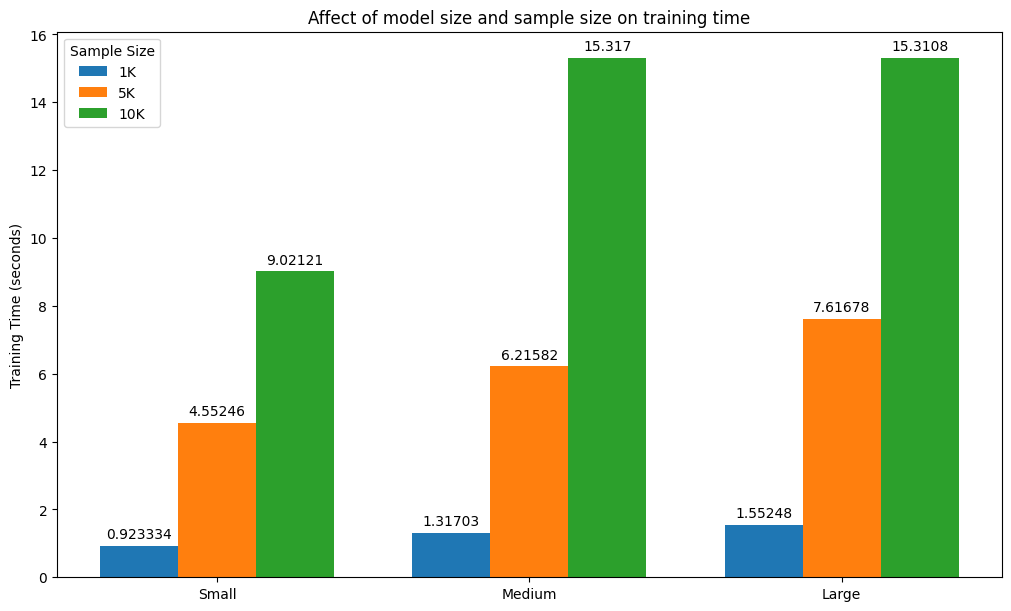

In [14]:
#make a plot
models = ['Small', 'Medium', 'Large']
training_times = {
    '1K': [time_1k_small, time_1k_mid, time_1k_big],
    '5K': [time_5k_small, time_5k_mid, time_5k_big],
    '10K': [time_10k_small, time_10k_mid, time_10k_big]
}

x = np.arange(len(models))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))

for sample_size, times in training_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, times, width, label=sample_size)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Training Time (seconds)')
ax.set_title('Affect of model size and sample size on training time')
ax.set_xticks(x + width, models)
ax.legend(title='Sample Size')
plt.show()


From the bar chart we can see that for every model complexity, training time scales with sample size. 
Across the three model complexities, when sample size changes from 1K to 5K, the training time scales by ~5; when sample size changes from 5K to 10K, the training time scales by ~2;when sample size changes from 1K to 10K, the training time scales by ~10.

This scaling beviour is linear, which matches the expectation that time complexity should be $O(N)$.

(Scalre factor = new / old)

However, the scaling is not as signifant for model complexities.When comparing time to train same-size dataset across different models, the difference in time taken for 1K dataset is less than 1 second; difference for 5K dataset is less than 2 seconds; althought there is ~6 seconds difference when training a 10K dataset in the simplest model compared to the medium and large ones, there is a plateau effect for training 0K dataset with medium or large complexity models. 

This may suggest a sign of bottleneck - the system may hit a limit on CPU thorughput or memory bandwidth, or that complexity increase is not significant enough to overcome constant factors.






## Memory Usage

This is to profile fewer epochs (e.g. 5) to find bottleneck in memory usage. Profiling the entire fit method (e.g. with 200 epochs) will produce a file too big.

### Small Model

In [15]:
#1K data
memory_1k_small = pa.memory_usage(Xtr_1k, ytr_1k, Xte_1k,model_small1)
print("Memory usage during training:")
print(memory_1k_small[0].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))
print("Memory usage during prediction:")
print(memory_1k_small[1].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

Memory usage during training:
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                               aten::mm         1.63%       1.615ms         1.76%       1.742ms      11.611us     412.50 KB     412.50 KB           150  
                                            aten::addmm         1.58%       1.559ms         2.04%       2.018ms      20.176us     386.72 KB     386.72 KB           100  
                                        aten::clamp_min         0.16%     159.079us         0.16%     159.079us       3.

In [16]:
#5K data
memory_5k_small = pa.memory_usage(Xtr_5k, ytr_5k, Xte_5k,model_small1)
print("Memory usage during training:")
print(memory_5k_small[0].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

print("Memory usage during prediction:")
print(memory_5k_small[1].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

Memory usage during training:
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                               aten::mm         1.10%       2.581ms         1.36%       3.206ms       4.547us       2.00 MB       2.00 MB           705  
                                            aten::addmm         1.19%       2.800ms         2.09%       4.903ms      10.432us       1.89 MB       1.89 MB           470  
                                        aten::clamp_min         0.26%     614.641us         0.26%     614.641us       2.

In [17]:
#10K data
memory_10k_small = pa.memory_usage(Xtr_10k, ytr_10k, Xte_10k,model_small1)
print("Memory usage during training:")
print(memory_10k_small[0].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

print("Memory usage during prediction:")
print(memory_10k_small[1].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

Memory usage during training:
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                               aten::mm         1.09%       5.295ms         1.34%       6.506ms       4.614us       4.01 MB       4.01 MB          1410  
                                            aten::addmm         1.14%       5.541ms         1.99%       9.714ms      10.334us       3.78 MB       3.78 MB           940  
                                        aten::clamp_min         0.25%       1.219ms         0.25%       1.219ms       2.

### Medium Model

In [18]:
#1K data
memory_1k_mid = pa.memory_usage(Xtr_1k, ytr_1k, Xte_1k,model_medium1)
print("Memory usage during training:")
print(memory_1k_mid[0].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

print("Memory usage during prediction:")
print(memory_1k_mid[1].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

Memory usage during training:
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                               aten::mm         1.79%       1.699ms         2.14%       2.028ms       5.794us       1.83 MB       1.83 MB           350  
                                            aten::addmm         1.83%       1.731ms         2.92%       2.765ms      13.827us       1.29 MB       1.29 MB           200  
                                        aten::clamp_min         0.52%     493.294us         0.52%     493.294us       3.

In [19]:
#5K data
memory_5k_mid = pa.memory_usage(Xtr_5k, ytr_5k, Xte_5k,model_medium1)
print("Memory usage during training:")
print(memory_5k_mid[0].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

print("Memory usage during prediction:")
print(memory_5k_mid[1].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

Memory usage during training:
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                               aten::mm         1.57%       6.973ms         1.93%       8.572ms       5.211us       9.00 MB       9.00 MB          1645  
                                            aten::addmm         1.84%       8.182ms         2.79%      12.369ms      13.159us       6.47 MB       6.47 MB           940  
                                        aten::clamp_min         0.43%       1.899ms         0.43%       1.899ms       2.

In [20]:
#10K data
memory_10k_mid = pa.memory_usage(Xtr_10k, ytr_10k, Xte_10k,model_medium1)
print("Memory usage during training:")
print(memory_10k_mid[0].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

print("Memory usage during prediction:")
print(memory_10k_mid[1].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

Memory usage during training:
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                               aten::mm         1.70%      13.147ms         2.10%      16.231ms       4.934us      18.01 MB      18.01 MB          3290  
                                            aten::addmm         1.67%      12.904ms         2.78%      21.486ms      11.429us      12.93 MB      12.93 MB          1880  
                                        aten::clamp_min         0.44%       3.410ms         0.44%       3.410ms       2.

### Large Model

In [21]:
#1K data
memory_1k_big = pa.memory_usage(Xtr_1k, ytr_1k, Xte_1k,model_large1)
print("Memory usage during training:")
print(memory_1k_big[0].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

print("Memory usage during prediction:")
print(memory_1k_big[1].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

Memory usage during training:
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                               aten::mm         1.74%       2.158ms         2.14%       2.644ms       5.876us       4.92 MB       4.92 MB           450  
                                            aten::addmm         4.37%       5.414ms         5.40%       6.682ms      26.727us       2.76 MB       2.76 MB           250  
                                        aten::clamp_min         0.53%     655.971us         0.53%     655.971us       3.

In [22]:
#5K data
memory_5k_big = pa.memory_usage(Xtr_5k, ytr_5k, Xte_5k,model_large1)
print("Memory usage during training:")
print(memory_5k_big[0].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

print("Memory usage during prediction:")
print(memory_5k_big[1].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

Memory usage during training:
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                               aten::mm         2.01%       7.936ms         2.51%       9.923ms       4.692us      23.96 MB      23.96 MB          2115  
                                            aten::addmm         2.82%      11.133ms         4.14%      16.359ms      13.923us      13.79 MB      13.79 MB          1175  
                                        aten::clamp_min         0.63%       2.488ms         0.63%       2.488ms       2.

In [23]:
#10K data
memory_10k_big = pa.memory_usage(Xtr_10k, ytr_10k, Xte_10k,model_large1)
print("Memory usage during training:")
print(memory_1k_big[0].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

print("Memory usage during prediction:")
print(memory_10k_big[1].key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))

Memory usage during training:
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                               aten::mm         1.74%       2.158ms         2.14%       2.644ms       5.876us       4.92 MB       4.92 MB           450  
                                            aten::addmm         4.37%       5.414ms         5.40%       6.682ms      26.727us       2.76 MB       2.76 MB           250  
                                        aten::clamp_min         0.53%     655.971us         0.53%     655.971us       3.

In summary of the tables, by looking at parameters: 'Self CPU time' and CPU memory, the memory-heavy operators are `aten::addmm` and `add::mm` - ones that involve matrix multiplication. Also the largest number of calls are all from `atem::empty_strided`. These conclusions are general for all 3 model complexities and all 3 dataset sizes, for both training and prediction models. Since prediction function involves less calculation than training, where foward pass and backward propagations are involed, so the Seld CPU time and CPU Memory usage tend to be much less for prediciton - with the maximum CPU memory usage is 1.84MB for the most complex model with 10K dataset, whilst training with medium model with 1K dataset is already 1.83MB.

Nonetheless, for both training and prediciton, Self CPU time and CPU Mem increases as model complexity and datasize increases.

Potential bottlenecks for memory-heavy operators may be CPU-Bound Exucutions. Since `aten:mm` and `aten:addmm` are used as building blocks for the layers of the neural network, this is where most FLOPs are required, and where CPU throughput is primarily spent. There may also be too many excessive tensors made by  `atem::empty_strided` creating overhead.

## Accuracy Metrics

### Small Model

In [33]:
#1K data
mse_1k_small, r2_1k_small = pa.accuracy_metrics(Xtr_1k,ytr_1k,Xte_1k,yte_1k,model_small)
print(f"Mean Squared Error on test data: {mse_1k_small:.4f}")
print(f"R^2 Score on test data: {r2_1k_small}")

Mean Squared Error on test data: 2.0855
R^2 Score on test data: 0.9994357824325562


In [34]:
#5K data
mse_5k_small, r2_5k_small = pa.accuracy_metrics(Xtr_5k,ytr_5k,Xte_5k,yte_5k,model_small)
print(f"Mean Squared Error on test data: {mse_5k_small:.4f}")
print(f"R^2 Score on test data: {r2_5k_small}")

Mean Squared Error on test data: 2.1134
R^2 Score on test data: 0.9999020099639893


In [35]:
#10K data
mse_10k_small, r2_10k_small = pa.accuracy_metrics(Xtr_10k,ytr_10k,Xte_10k,yte_10k,model_small)
print(f"Mean Squared Error on test data: {mse_10k_small:.4f}")
print(f"R^2 Score on test data: {r2_10k_small}")

Mean Squared Error on test data: 1.6076
R^2 Score on test data: 0.9999182820320129


### Medium Model

In [36]:
#1K data
mse_1k_mid, r2_1k_mid = pa.accuracy_metrics(Xtr_1k,ytr_1k,Xte_1k,yte_1k,model_medium)
print(f"Mean Squared Error on test data: {mse_1k_mid:.4f}")
print(f"R^2 Score on test data: {r2_1k_mid}")

Mean Squared Error on test data: 2.2705
R^2 Score on test data: 0.9993857145309448


In [37]:
#5K data
mse_5k_mid, r2_5k_mid = pa.accuracy_metrics(Xtr_5k,ytr_5k,Xte_5k,yte_5k,model_medium)
print(f"Mean Squared Error on test data: {mse_5k_mid:.4f}")
print(f"R^2 Score on test data: {r2_5k_mid}")

Mean Squared Error on test data: 1.4659
R^2 Score on test data: 0.999932050704956


In [38]:
#10K data
mse_10k_mid, r2_10k_mid = pa.accuracy_metrics(Xtr_10k,ytr_10k,Xte_10k,yte_10k,model_medium)  
print(f"Mean Squared Error on test data: {mse_10k_mid:.4f}")
print(f"R^2 Score on test data: {r2_10k_mid}")

Mean Squared Error on test data: 1.2892
R^2 Score on test data: 0.9999344944953918


### Large Model

In [39]:
#1K data
mse_1k_big, r2_1k_big = pa.accuracy_metrics(Xtr_1k,ytr_1k,Xte_1k,yte_1k,model_large)
print(f"Mean Squared Error on test data: {mse_1k_big:.4f}")
print(f"R^2 Score on test data: {r2_1k_big}")

Mean Squared Error on test data: 2.3504
R^2 Score on test data: 0.9993640780448914


In [40]:
#5K data
mse_5k_big, r2_5k_big = pa.accuracy_metrics(Xtr_5k,ytr_5k,Xte_5k,yte_5k,model_large)
print(f"Mean Squared Error on test data: {mse_5k_big:.4f}")
print(f"R^2 Score on test data: {r2_5k_big}")

Mean Squared Error on test data: 2.2474
R^2 Score on test data: 0.9998958110809326


In [41]:
#10K data
mse_10k_big, r2_10k_big = pa.accuracy_metrics(Xtr_10k,ytr_10k,Xte_10k,yte_10k,model_large)
print(f"Mean Squared Error on test data: {mse_10k_big:.4f}")
print(f"R^2 Score on test data: {r2_10k_big}")

Mean Squared Error on test data: 1.1406
R^2 Score on test data: 0.9999420046806335


In [45]:
#displaying all accuracy metrics in a table

data_sizes = ['1K', '5K', '10K']
model_sizes = ['Small', 'Medium', 'Large']
accuracy_table = []
for i, data_size in enumerate(data_sizes):
    for j, model_size in enumerate(model_sizes):
        mse = [mse_1k_small, mse_5k_small, mse_10k_small,
               mse_1k_mid, mse_5k_mid, mse_10k_mid,
               mse_1k_big, mse_5k_big, mse_10k_big][i * 3 + j]
        r2 = [r2_1k_small, r2_5k_small, r2_10k_small,
               r2_1k_mid, r2_5k_mid, r2_10k_mid,
               r2_1k_big, r2_5k_big, r2_10k_big][i * 3 + j]
        accuracy_table.append({
            'Data Size': data_size,
            'Model Size': model_size,
            'MSE': mse,
            'R^2': r2
        })
print("\nAccuracy Metrics Table:")
print(f"{'Data Size':<10} {'Model Size':<10} {'MSE':<15} {'R^2':<10}")
for row in accuracy_table:
    print(f"{row['Data Size']:<10} {row['Model Size']:<10} {row['MSE']:<15.4f} {row['R^2']:<10}")


Accuracy Metrics Table:
Data Size  Model Size MSE             R^2       
1K         Small      2.0855          0.9994357824325562
1K         Medium     2.1134          0.9999020099639893
1K         Large      1.6076          0.9999182820320129
5K         Small      2.2705          0.9993857145309448
5K         Medium     1.4659          0.999932050704956
5K         Large      1.2892          0.9999344944953918
10K        Small      2.3504          0.9993640780448914
10K        Medium     2.2474          0.9998958110809326
10K        Large      1.1406          0.9999420046806335


There is no clean pattern for MSE and $R^2$ value accross different dataset sizes. Since this is a light-weight, simple neural network, the MSE are already small, and $R^2$ values are already high (all ~0.999 to 3 significant figures).
The error is mainly caused by the synthetic noise I added when generating samples using `make_regression` from the `sklearn` package. There I have set noise = 1. The high $R^2$ score means the model is fitting well, and the remaining error is the irredusible white noise. 

The noticeable monotonic pattern is that for the most complex model out of the three, as dataset size increases, MSE decreases. MSE is the mean squared distance difference between true taget value and predicted, so the decrease in MSE value indicates a better accuracy.

